In [1]:
import pandas
import numpy
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
import math

In [2]:
# Gather data from CSVs exported from data scraping/cleaning notebook
MLBData = pandas.read_csv('MLBPlayerInfo.csv')
SoccerData = pandas.read_csv('SoccerPlayerInfo.csv')

# Is there a significant difference in BMI when comparing professional soccer and baseball players?

### A. Starting with generic height/weight regression analysis

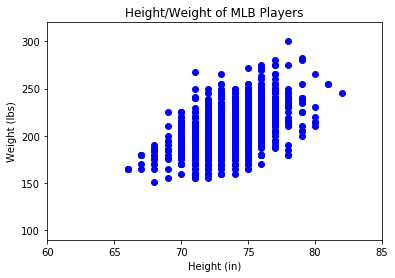

In [3]:
pyplot.scatter(MLBData['Height'], MLBData['Weight'], color='blue')
pyplot.title('Height/Weight of MLB Players')
pyplot.xlim(60, 85)
pyplot.ylim(90, 320)
pyplot.xlabel('Height (in)')
pyplot.ylabel('Weight (lbs)')
pyplot.show()

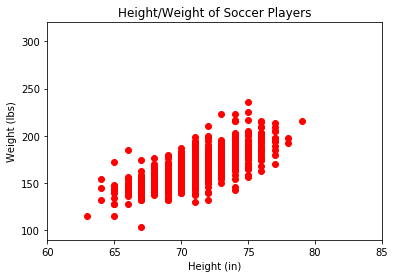

In [4]:
pyplot.scatter(SoccerData['Height'], SoccerData['Weight'], color='red')
pyplot.title('Height/Weight of Soccer Players')
pyplot.xlim(60, 85)
pyplot.ylim(90, 320)
pyplot.xlabel('Height (in)')
pyplot.ylabel('Weight (lbs)')
pyplot.show()

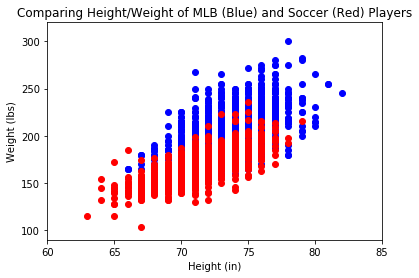

In [5]:
pyplot.scatter(MLBData['Height'], MLBData['Weight'], color='blue')
pyplot.scatter(SoccerData['Height'], SoccerData['Weight'], color='red')
pyplot.title('Comparing Height/Weight of MLB (Blue) and Soccer (Red) Players')
pyplot.xlim(60, 85)
pyplot.ylim(90, 320)
pyplot.xlabel('Height (in)')
pyplot.ylabel('Weight (lbs)')
pyplot.show()

**These plots show a general difference between sports in that soccer players are generally leaner with less variance than baseball players.**

In [6]:
SoccerReg = LinearRegression()
soc_x = SoccerData['Height'].values.reshape(-1,1)
soc_y = SoccerData['Weight'].values.reshape(-1,1)
SoccerReg.fit(soc_x, soc_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
MLBReg = LinearRegression()
mlb_x = MLBData['Height'].values.reshape(-1,1)
mlb_y = MLBData['Weight'].values.reshape(-1,1)
MLBReg.fit(mlb_x, mlb_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
print('Slope of Soccer Height/Weight Regression: ', SoccerReg.coef_[0,0])
print('R-Squared of Soccer Height/Weight Regression: ', SoccerReg.score(soc_x, soc_y))

Slope of Soccer Height/Weight Regression:  4.846105111137425
R-Squared of Soccer Height/Weight Regression:  0.5609594295550016


In [9]:
print('Slope of MLB Height/Weight Regression: ', MLBReg.coef_[0,0])
print('R-Squared of MLB Height/Weight Regression: ', MLBReg.score(mlb_x, mlb_y))

Slope of MLB Height/Weight Regression:  4.5926192417129
R-Squared of MLB Height/Weight Regression:  0.24699218803061818


**These metrics make sense because both sports have a wide array of BMIs with such a large sample, especially a sport like baseball where we would expect a greater variation in BMI due to positions like catchers vs shortstops demanding different physical characteristics. This is represented through a much lower R-Squared in MLB data than soccer data due to a larger variance in player physicality. It can also be seen that generally weights of MLB players are higher than soccer based on the slopes representing weight/height ratio.**

### B. Distribution and probability of BMI analysis

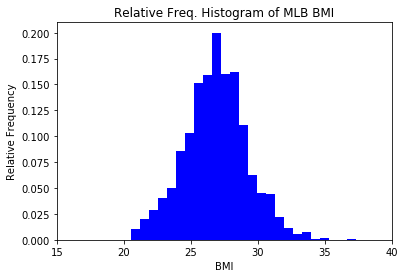

In [10]:
pyplot.hist(MLBData['BMI'], bins=25, density=1, color='blue')
pyplot.xlim(15, 40)
pyplot.title('Relative Freq. Histogram of MLB BMI')
pyplot.xlabel('BMI')
pyplot.ylabel('Relative Frequency')
pyplot.show()

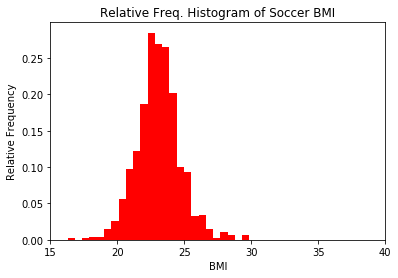

In [11]:
pyplot.hist(SoccerData['BMI'], bins=25, density=1, color='red')
pyplot.xlim(15, 40)
pyplot.title('Relative Freq. Histogram of Soccer BMI')
pyplot.xlabel('BMI')
pyplot.ylabel('Relative Frequency')
pyplot.show()

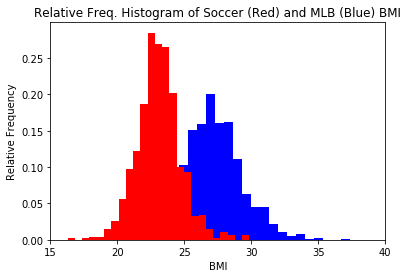

In [12]:
pyplot.hist(MLBData['BMI'], bins=25, density=1, color='blue')
pyplot.hist(SoccerData['BMI'], bins=25, density=1, color='red')
pyplot.xlim(15, 40)
pyplot.title('Relative Freq. Histogram of Soccer (Red) and MLB (Blue) BMI')
pyplot.xlabel('BMI')
pyplot.ylabel('Relative Frequency')
pyplot.show()

In [13]:
print('Soccer BMI Mean: ', SoccerData['BMI'].mean())
print('MLB BMI Mean: ', MLBData['BMI'].mean())
print('Soccer BMI Standard Deviation: ', SoccerData['BMI'].std())
print('MLB BMI Standard Deviation: ', MLBData['BMI'].std())

Soccer BMI Mean:  23.07854060660071
MLB BMI Mean:  26.945003613304507
Soccer BMI Standard Deviation:  1.6381645793740578
MLB BMI Standard Deviation:  2.3421206086706214


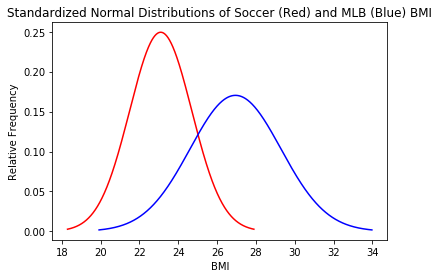

In [14]:
mu_soc = 23.093
sigma_soc = 1.6
mu_mlb = 26.945
sigma_mlb = 2.342

x_soc = numpy.linspace(mu_soc - 3 * sigma_soc, mu_soc + 3 * sigma_soc, 1000)
x_mlb = numpy.linspace(mu_mlb - 3 * sigma_mlb, mu_mlb + 3 * sigma_mlb, 1000)

y_soc = stats.norm.pdf(x_soc, mu_soc, sigma_soc)
y_mlb = stats.norm.pdf(x_mlb, mu_mlb, sigma_mlb)

pyplot.plot(x_soc, y_soc, color='red')
pyplot.plot(x_mlb, y_mlb, color='blue')

pyplot.title('Standardized Normal Distributions of Soccer (Red) and MLB (Blue) BMI')
pyplot.xlabel('BMI')
pyplot.ylabel('Relative Frequency')

pyplot.show()

In [15]:
soccer_prob = [x_soc, y_soc]
mlb_prob = [x_mlb, y_mlb]

def nearest_i(arr, val):
    array = numpy.asarray(arr)
    idx = (numpy.abs(array - val)).argmin()
    return idx

def sport_prob_bmi(bmi):
    # MLB Probability
    i_mlb = nearest_i(mlb_prob[0], bmi)
    prob_mlb = mlb_prob[1][i_mlb]
    
    # Soccer Probability
    i_soc = nearest_i(soccer_prob[0], bmi)
    prob_soc = soccer_prob[1][i_soc]
    
    total_prob = prob_mlb+prob_soc
    
    # Print Results
    print('Probability of EPL/MLS Soccer Player Based on BMI = ' + str(bmi) + ': ', prob_soc/total_prob)
    print('Probability of MLB Baseball Player Based on BMI = ' + str(bmi) + ': ', prob_mlb/total_prob)

### Now that we have sport_prob_bmi which prints the relative probability of a soccer player based on EPL/MLS data vs the probability of an MLB player all based on normalized BMI distributions. Let's run some samples.

In [16]:
sport_prob_bmi(20)
print()
sport_prob_bmi(22)
print()
sport_prob_bmi(24)
print()
sport_prob_bmi(26)
print()
sport_prob_bmi(28)
print()
sport_prob_bmi(30)

Probability of EPL/MLS Soccer Player Based on BMI = 20:  0.9483040479882379
Probability of MLB Baseball Player Based on BMI = 20:  0.051695952011762185

Probability of EPL/MLS Soccer Player Based on BMI = 22:  0.9150605618020174
Probability of MLB Baseball Player Based on BMI = 22:  0.08493943819798253

Probability of EPL/MLS Soccer Player Based on BMI = 24:  0.733321829543923
Probability of MLB Baseball Player Based on BMI = 24:  0.266678170456077

Probability of EPL/MLS Soccer Player Based on BMI = 26:  0.2337541291491647
Probability of MLB Baseball Player Based on BMI = 26:  0.7662458708508353

Probability of EPL/MLS Soccer Player Based on BMI = 28:  0.017702499934628652
Probability of MLB Baseball Player Based on BMI = 28:  0.9822975000653714

Probability of EPL/MLS Soccer Player Based on BMI = 30:  0.036763966806304484
Probability of MLB Baseball Player Based on BMI = 30:  0.9632360331936956


### These results show the relative probabilities based on the standardized normal curves presented above, but how do they match up against our actual data?

In [17]:
def sport_based_bmi(bmi):
    # MLB Probability
    i_mlb = nearest_i(mlb_prob[0], bmi)
    prob_mlb = mlb_prob[1][i_mlb]
    
    # Soccer Probability
    i_soc = nearest_i(soccer_prob[0], bmi)
    prob_soc = soccer_prob[1][i_soc]
        
    # Return higher probability sport
    if prob_soc > prob_mlb:
        return 'Soccer'
    else:
        return 'Baseball'

In [18]:
MLBData['Sport Prediction'] = [sport_based_bmi(b) for b in MLBData['BMI']]
SoccerData['Sport Prediction'] = [sport_based_bmi(b) for b in SoccerData['BMI']]

In [19]:
MLBData.head(5)

,Unnamed: 0,Team,Name,Age,Bats,Throws,Height,Weight,Years in League,Games Played,WAR,BMI,Position,Sport Prediction
0,0,ARI,Nick Ahmed,29,R,R,74,195,6,158,4.3,25.033784,SS,Baseball
1,1,ARI,Abraham Almonte,30,B,R,69,210,7,17,0.6,31.008192,RF,Baseball
2,2,ARI,Matt Andriese,29,R,R,74,225,5,54,-0.1,28.885135,P,Baseball
3,3,ARI,Alex Avila,32,L,R,71,210,11,63,1.4,29.285856,C,Baseball
4,4,ARI,Archie Bradley,26,R,R,76,225,5,66,0.9,27.384868,P,Baseball


In [20]:
SoccerData.head(5)

,Unnamed: 0,League,Team,Name,Position,Age,Height,Weight,BMI,Rating,Sport Prediction
0,0,EPL,Arsenal,Bernd Leno,Goalkeeper,28,75,183,22.870933,6.88,Soccer
1,2,EPL,Arsenal,Héctor Bellerín,Defender,25,70,163,23.385510,6.63,Soccer
2,3,EPL,Arsenal,Calum Chambers,Defender,25,72,146,19.798997,6.86,Soccer
3,4,EPL,Arsenal,Rob Holding,Defender,24,72,165,22.375579,6.25,Soccer
4,5,EPL,Arsenal,Pablo Marí,Defender,26,75,192,23.995733,7.37,Soccer


### Now how often did our prediction match reality across EPL/MLS soccer data and MLB data?

In [21]:
mlb_size = len(MLBData.index)
mlb_predictions = len(MLBData[MLBData['Sport Prediction'] == 'Baseball'].index)
print('Accurate MLB Predictions: ' + str(mlb_predictions) + ' / ' + str(mlb_size) + ' = ', mlb_predictions/mlb_size)

Accurate MLB Predictions: 1262 / 1567 =  0.805360561582642


In [22]:
soccer_size = len(SoccerData.index)
soccer_predictions = len(SoccerData[SoccerData['Sport Prediction'] == 'Soccer'].index)
print('Accurate Soccer Predictions: ' + str(soccer_predictions) + ' / ' + str(soccer_size) + ' = ', soccer_predictions/soccer_size)

Accurate Soccer Predictions: 755 / 847 =  0.8913813459268005


In [23]:
print('Accurate Sport Predictions Across MLB/MLS/EPL Data: ' + str(soccer_predictions+mlb_predictions) + ' / ' + str(mlb_size+soccer_size) + ' = ', (soccer_predictions+mlb_predictions)/(soccer_size+mlb_size))

Accurate Sport Predictions Across MLB/MLS/EPL Data: 2017 / 2414 =  0.8355426677713339


### I'd say that's not too bad. We were able to predict sport with about 83.6% accuracy across a large sampling of 2414 soccer and MLB player BMI's. 